In [1]:
# load required packages
import netCDF4 as nc
import matplotlib.pyplot as plt
import cmocean 
import numpy as np
import matplotlib.image as mpimg
from matplotlib.ticker import MaxNLocator
from matplotlib import colors
import xarray as xr
from matplotlib.colors import ListedColormap

from IPython.display import display, Math
bprops = {'facecolor': 'white', 'edgecolor': 'none', 'pad': 2}

In [2]:
file_norot      = 'entrainment_norot_10j.nc'# f= 0 ; NN = 1e-4
file_u20        = 'u20.nc'                  # lat = 10 deg  ; NN = 1e-4
file_rot        = 'entrainment_rot_10j_bis.nc'  # f= 1e-4 ; NN = 1e-4
#file_fn_max     = 'f_n_max_bis.nc'              # f= 1e-4 ; NN = 2.5 e-5
#file_fn_min     = 'f_n_min_bis.nc'              # lat= 23 deg ; NN = 2 e-3
file_fn_max     = 'entrainment.nc'              # f= 1e-5 ; NN = 1e-4

#file_fn_max     = 'entrainment_f1e-5.nc'              # f= 1e-5 ; NN = 1e-4
file_fn_min     = 'entrainment_rot_10j_bis.nc'              # lat= 45 deg ; NN = 1e-4

g= 9.81



In [3]:

entrainment_rotdata = nc.Dataset(file_rot)         #  I use netCDF4 to convert the time date in second 
entrainment_rot = xr.open_dataset(file_rot)        #  I prefer use Xarray because it allow to better visualize the data (variable, shapes etc..)
entrainment_u20data = nc.Dataset(file_u20)         #  I use netCDF4 to convert the time date in second 
entrainment_u20= xr.open_dataset(file_u20) 
entrainment_fn_maxdata = nc.Dataset(file_fn_max)         #  I use netCDF4 to convert the time date in second 
entrainment_fn_max = xr.open_dataset(file_fn_max) 
entrainment_fn_mindata = nc.Dataset(file_fn_min)      #  I prefer use Xarray because it allow to better visualize the data (variable, shapes etc..)
entrainment_fn_min = xr.open_dataset(file_fn_min)

# model parameters (have to be consistent with gotm.yaml)
lat_rot     = 45.0                      # latitude 
tx      = 0.1027                  # surface stress

# derived parameters
f      = 4.*np.pi/86400.*np.sin(np.pi*lat_rot/180.)      # Coriolis parameter
us      = np.sqrt(tx/1027.)   # surface friction velocity

def coriolis (lat):
    return 4.*np.pi/86400.*np.sin(np.pi*lat/180.) 
f_u20 = coriolis(10)
#f_min = coriolis(24)
f_max = coriolis(90)
f_min = f

#NN_max = 2.5e-5
#NN_min = 2e-3
NN_max = NN0
NN_min = NN0
NN0 =  1e-4
N_u20 = 1*10**(-2)

def moyenne_variable_voisinage(variable, indices_periode):
    moyennes = np.zeros_like(variable)

    # Calculer la moitié de la période inertielle
    demi_periode = int(np.ceil(np.mean(indices_periode) / 2))

    # Itérer sur les indices de la variable
    for i in range(len(variable)):
        # Déterminer les indices du voisinage en tenant compte des bords
        debut_voisinage = max(0, i - demi_periode)
        fin_voisinage = min(len(variable), i + demi_periode + 1)

        # Calculer la moyenne du voisinage verticalement
        moyenne_voisinage = np.mean(variable[debut_voisinage:fin_voisinage, :], axis=0)
        moyennes[i, :] = moyenne_voisinage

    return moyennes

NameError: name 'NN0' is not defined

In [82]:
# extract variable for no rotation
z           = entrainment_rot.variables['z'][:, :, 0, 0]
zi          = entrainment_rot.variables['zi'][:, :, 0, 0]
t           = entrainment_rotdata.variables['time'][:]
u_rot       = entrainment_rot.variables['u'][:, :, 0, 0]
v_rot       = entrainment_rot.variables['v'][:, :, 0, 0]
nuh_rot     = entrainment_rot.variables['nuh'][:, :, 0, 0]
NN_rot      = entrainment_rotdata.variables['NN'][:, :, 0, 0]
u_taus_rot  = entrainment_rot.variables['u_taus'][:, 0, 0]
h_rot       = entrainment_rot.variables['mld_surf'][:, 0, 0]
rho_rot     = entrainment_rot.variables['rho'][: ,:, 0, 0]
T_rot       = entrainment_rot.variables['temp'][: ,:, 0, 0]
Ekin_rot    = entrainment_rot.variables['Ekin'][: , 0, 0]
Epot_rot    = entrainment_rot.variables['Epot'][: , 0, 0]
Eturb_rot   = entrainment_rot.variables['Eturb'][: , 0, 0]
Rig_rot     = entrainment_rot.variables['Rig'][: ,:, 0, 0]
Rif_rot     = entrainment_rot.variables['xRf'][: ,:, 0, 0]
tke_rot     = entrainment_rot.variables['tke'][:, :, 0, 0]
eps_rot     = entrainment_rot.variables['eps'][:, :, 0, 0]
P_rot       = entrainment_rot.variables['P'][:, :, 0, 0]
G_rot       = entrainment_rot.variables['G'][:, :, 0, 0]
num_rot     = entrainment_rot.variables['num'][:, :, 0, 0]
nuh_rot     = entrainment_rot.variables['nuh'][:, :, 0, 0]
nus_rot     = entrainment_rot.variables['nus'][:, :, 0, 0]
avh_rot     = entrainment_rot.variables['avh'][:, :, 0, 0]
b_rot       = entrainment_rot.variables['buoy'][:, :, 0, 0]
cmue1_rot   = entrainment_rot.variables['cmue1'][:, :, 0, 0]

z_u20             = entrainment_u20.variables['z'][:, :, 0, 0]
zi_u20            = entrainment_u20.variables['zi'][:, :, 0, 0]
t_u20             = entrainment_u20data.variables['time'][:]
u_u20       = entrainment_u20.variables['u'][:, :, 0, 0]
v_u20       = entrainment_u20.variables['v'][:, :, 0, 0]
NN_u20      = entrainment_u20.variables['NN'][:, :, 0, 0]

u_taus_u20  = entrainment_u20.variables['u_taus'][:, 0, 0]
h_u20       = entrainment_u20.variables['mld_surf'][: , 0, 0]
rho_u20     = entrainment_u20.variables['rho'][: ,:, 0, 0]
Ekin_u20    = entrainment_u20.variables['Ekin'][: , 0, 0]
T_u20       = entrainment_u20.variables['temp'][: ,:, 0, 0]
Epot_u20    = entrainment_u20.variables['Epot'][: , 0, 0]
Eturb_u20   = entrainment_u20.variables['Eturb'][: , 0, 0]
tke_u20     = entrainment_u20.variables['tke'][:, :, 0, 0]
eps_u20     = entrainment_u20.variables['eps'][:, :, 0, 0]
P_u20       = entrainment_u20.variables['P'][:, :, 0, 0]
G_u20       = entrainment_u20.variables['G'][:, :, 0, 0]
num_u20     = entrainment_u20.variables['num'][:, :, 0, 0]
nuh_u20     = entrainment_u20.variables['nuh'][:, :, 0, 0]
nus_u20     = entrainment_u20.variables['nus'][:, :, 0, 0]
avh_u20     = entrainment_u20.variables['avh'][:, :, 0, 0]
b_u20       = entrainment_u20.variables['buoy'][:, :, 0, 0]
cmue1_u20   = entrainment_u20.variables['cmue1'][:, :, 0, 0]


z_fn           = entrainment_fn_max.variables['z'][:, :, 0, 0]
zi_fn          = entrainment_fn_max.variables['zi'][:, :, 0, 0]
t_fn           = entrainment_fn_maxdata.variables['time'][:]
t_fnmin           = entrainment_fn_mindata.variables['time'][:]
t_fnmax           = entrainment_fn_maxdata.variables['time'][:]
NN_fn_max      = entrainment_fn_maxdata.variables['NN'][:, :, 0, 0]
NN_fn_min      = entrainment_fn_mindata.variables['NN'][:, :, 0, 0]
h_fn_max       = entrainment_fn_max.variables['mld_surf'][: , 0, 0]
h_fn_min       = entrainment_fn_min.variables['mld_surf'][: , 0, 0]
P_fn_max       = entrainment_fn_max.variables['P'][:, :, 0, 0]
P_fn_min       = entrainment_fn_min.variables['P'][:, :, 0, 0]
G_fn_max       = entrainment_fn_max.variables['G'][:, :, 0, 0]
G_fn_min       = entrainment_fn_min.variables['G'][:, :, 0, 0]
eps_max        = entrainment_fn_max.variables['eps'][:, :, 0, 0]
eps_min        = entrainment_fn_min.variables['eps'][:, :, 0, 0]
num_max        = entrainment_fn_max.variables['num'][:, :, 0, 0]
num_min        = entrainment_fn_min.variables['num'][:, :, 0, 0]
u_max          = entrainment_fn_max.variables['u'][:, :, 0, 0]
u_min          = entrainment_fn_min.variables['u'][:, :, 0, 0]
v_max          = entrainment_fn_max.variables['v'][:, :, 0, 0]
v_min          = entrainment_fn_min.variables['v'][:, :, 0, 0]
rho_min        = entrainment_fn_min.variables['rho'][: ,:, 0, 0]
rho_max        = entrainment_fn_max.variables['rho'][: ,:, 0, 0]

In [83]:
L_p73,L_p73_min,L_p73_max

(9.860738417835018, 9.860738417835018, 31.39494163289308)

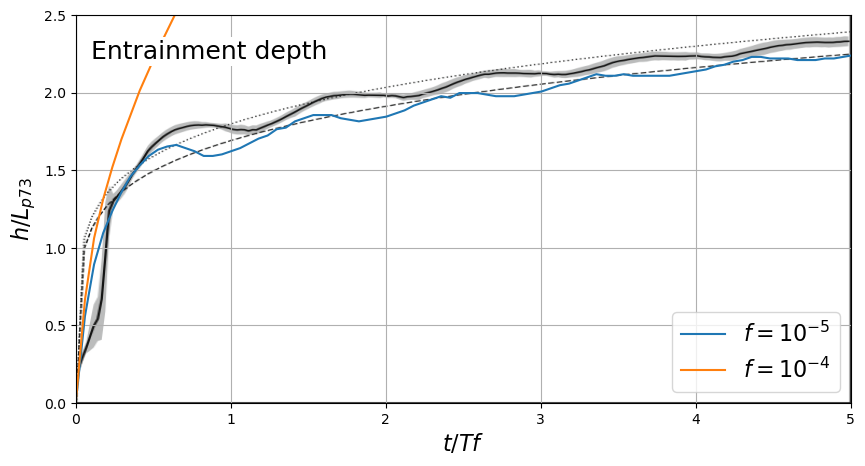

In [84]:
Ric            = 1
kappa          = 0.41
Gamma0         = 0.3
T_f            = 2*np.pi/f   #f = 1e-4

t_15_max       = (t_fnmax/T_f)**(1/5)
T_f_min        = 2*np.pi/f_min

T_f_u20        = 2*np.pi/f_u20
T_u20       = (t_u20/T_f_u20)**(0.18)

L_p73          =  us / np.sqrt(np.sqrt(NN0)*f)
L_p73_max      =  us / np.sqrt(np.sqrt(NN_max)*f_max)
L_p73_min      =  us / np.sqrt(np.sqrt(NN_min)*f_min)



image = mpimg.imread('U20.png')


# Afficher l'image
plt.figure(figsize=(10, 6))
x_min, x_max = 0, 5
y_min, y_max = 0, 2.5

# Afficher l'image avec les limites des axes redimensionnées
plt.imshow(image, extent=[x_min, x_max, y_min, y_max])

#lt.plot(t_u20/T_f_u20,h_u20,label=r' $h$ gotm ')

#plt.plot(t_fn/T_f_min,h_min/L_p73_min ,label=r' $f/N$ min  ')

plt.plot(t_fnmin/T_f_min,h_fn_min/L_p73_min ,label=r'$f=10^{-5}$')

#plt.plot(t_fn/T_f,h_max/L_p73_max ,label=r' $f/N$ max  ')

plt.plot(t_fnmax/T_f,h_fn_max/L_p73_max ,label=r'$f=10^{-4}$')
plt.text(0.1, 2.19, 'Entrainment depth', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', fontsize=18, bbox=bprops)

plt.grid()
plt.xlabel('$t/Tf$', fontsize=16)
plt.ylabel('$h/L_{p73}$', fontsize=16)
plt.xlim([0, 5])
plt.ylim([0, 2.5])

plt.legend(loc = 'lower right', fontsize=16)
#plt.yscale('log')


plt.savefig('U20_gotm')

plt.show()

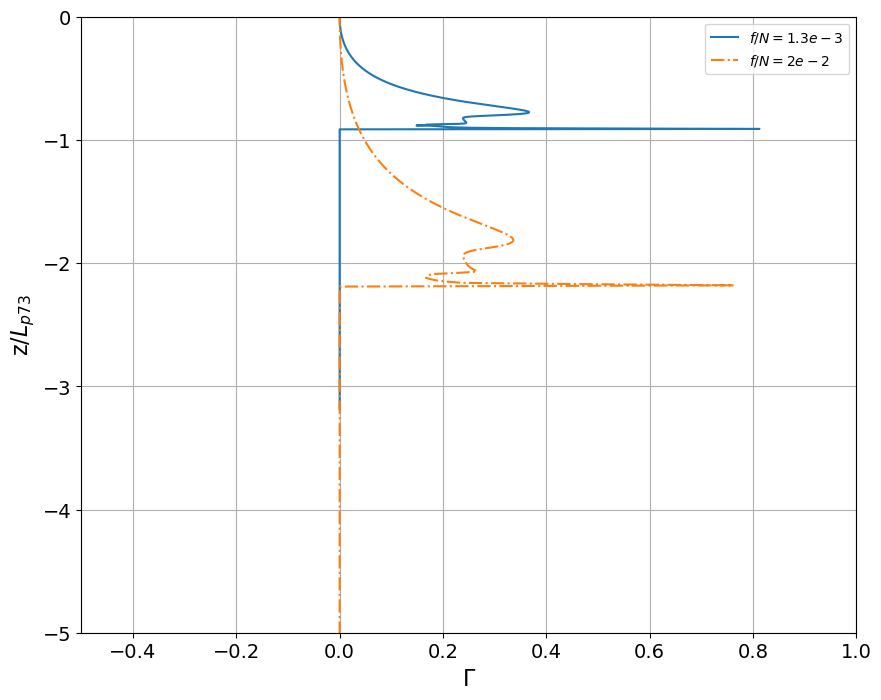

In [67]:
z1D   = z[0, :]
zi1D  = zi[0, :]
z1D_fn   = z_fn[0, :]
zi1D_fn  = zi_fn[0, :]


def it_TF2 (nb,f):
    T_f = 2*np.pi /f
    idt = nb*T_f
    id = np.argmin(np.abs(t-idt))
    return id

last_index = -1
Tf_min = it_TF2 (6.5,f_min)
Tf_max = it_TF2 (6.5,f_max)
Tf_min = it_TF2 (5,f_min)
Tf_max = it_TF2 (5,f_max)
    

# Sélectionner les données au dernier instant
#P_rot = moyenne_variable_voisinage(P_rot,2*Tf_max)
#G_rot = moyenne_variable_voisinage(G_rot,2*Tf_max)
#eps_rot = moyenne_variable_voisinage(eps_rot,2*Tf_max)

P_rot_last = P_rot[last_index, :-1]
eps_rot_last = eps_rot[last_index, :-1]
G_rot_last = G_rot[last_index, :-1]
zi_last = zi1D[:-1]

Ri_f = -G_rot_last/P_rot_last
Ri_f = np.where((Ri_f > 1e1), 0, Ri_f)
gamma = Ri_f/(1+Ri_f)



### F/N min 

### A commenter si on ne veux pas moyenner sur une periode inertielle.
#P_fn_min = moyenne_variable_voisinage(P_fn_min,1*Tf_min)
#G_fn_min = moyenne_variable_voisinage(G_fn_min,1*Tf_min)
#eps_min = moyenne_variable_voisinage(eps_min,1*Tf_min)

P_fn_min_last = P_fn_min[Tf_min, :-1]
G_fn_min_last = G_fn_min[Tf_min, :-1]
zi_fn_last = zi1D_fn[:-1]
eps_min_last = eps_min[Tf_min, :-1]
num_min_last = num_min[Tf_min, :-1]
Ri_fn_min = -G_fn_min_last/P_fn_min_last
Ri_fn_min = np.where((Ri_fn_min > 1e1), 0, Ri_fn_min)
gamma_fn_min = Ri_fn_min/(1+Ri_fn_min)
u_min_last = u_min[Tf_min, :]
v_min_last = v_min[Tf_min, :]
rho_min_last = rho_min[Tf_min, :]


### F/N max
#P_fn_max = moyenne_variable_voisinage(P_fn_max,1*Tf_max)
#G_fn_max = moyenne_variable_voisinage(G_fn_max,1*Tf_max)
#eps_max = moyenne_variable_voisinage(eps_max,1*Tf_max)

P_fn_max_last = P_fn_max[Tf_max, :-1]
G_fn_max_last = G_fn_max[Tf_max, :-1]
zi_fn_last = zi1D_fn[:-1]
eps_max_last = eps_max[Tf_max, :-1]
num_max_last = num_max[Tf_max, :-1]
Ri_fn_max = -G_fn_max_last/P_fn_max_last
Ri_fn_max = np.where((Ri_fn_max > 1e1), 0, Ri_fn_max)
gamma_fn_max = Ri_fn_max/(1+Ri_fn_max)
u_max_last = u_max[Tf_max, :]
v_max_last = v_max[Tf_max, :]
rho_max_last = rho_max[Tf_max, :]

# Création de la figure et du graphique
fig, ax = plt.subplots(figsize=(10, 8))

# Tracer la fonction existante
#ax.plot(gamma, zi[-1, :-1]/L_p73_min, label=r'$\Gamma$')
ax.plot(gamma_fn_min, zi_fn[-1, :-1]/L_p73_min, label=r'$f/N = 1.3e-3$')
ax.plot(gamma_fn_max, zi_fn[-1, :-1]/L_p73_max, '-.',label=r'$f/N = 2e-2$')
# Tracer la nouvelle fonction
#ax.plot(custom_function_values, z_custom_function, label='Approximated Function', linestyle='--', color='red')

# Inverser l'axe y
ax.invert_yaxis()

# Ajouter une légende
ax.legend()

# Grille
ax.grid()

# Ajouter des labels et ajuster les paramètres de l'axe
ax.set_ylabel(r'z/$L_{p73}$', fontsize=16)
ax.set_xlabel(r'$\Gamma$', fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax.set_ylim([-5, 0])
ax.set_xlim([-0.5, 1])

# Sauvegarder le graphique
#plt.savefig('profil_vertical_gamma')

# Afficher le graphique
plt.show()


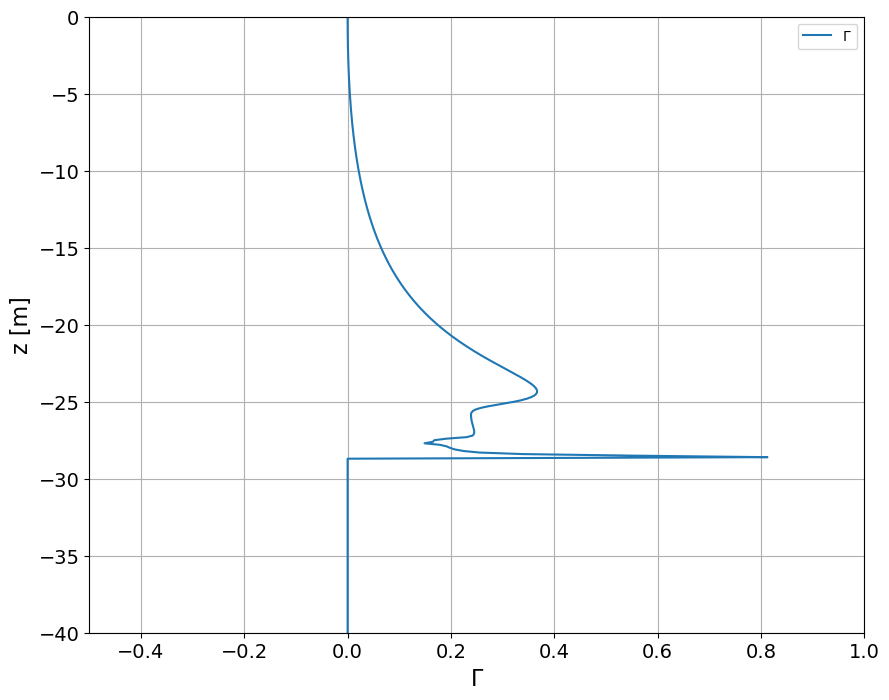

In [48]:

# Création de la fonction spécifiée
def custom_function(z):
    result = np.zeros_like(z)
    mask1 = (z >= 24) & (z <= 28)
    mask2 = (z > 0) & (z < 24) | (z >= 28) & (z <= 40)
    result[mask1] = 0.5
    result[mask2] = 0
    return result

# Création du tableau de z pour la nouvelle fonction
z_custom_function = -zi[-1, :-1]

# Calcul des valeurs de la nouvelle fonction
custom_function_values = custom_function(z_custom_function)

# Création de la figure et du graphique
fig, ax = plt.subplots(figsize=(10, 8))

# Tracer la fonction existante
ax.plot(gamma, zi[-1, :-1], label=r'$\Gamma$')

# Tracer la nouvelle fonction
#ax.plot(custom_function_values, z_custom_function, label='Approximated Function', linestyle='--', color='red')

# Inverser l'axe y
ax.invert_yaxis()

# Ajouter une légende
ax.legend()

# Grille
ax.grid()

# Ajouter des labels et ajuster les paramètres de l'axe
ax.set_ylabel('z [m]', fontsize=16)
ax.set_xlabel(r'$\Gamma$', fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax.set_ylim([-40, 0])
ax.set_xlim([-0.5, 1])

# Sauvegarder le graphique
plt.savefig('profil_vertical_gamma')

# Afficher le graphique
plt.show()

## Profil de dissipation


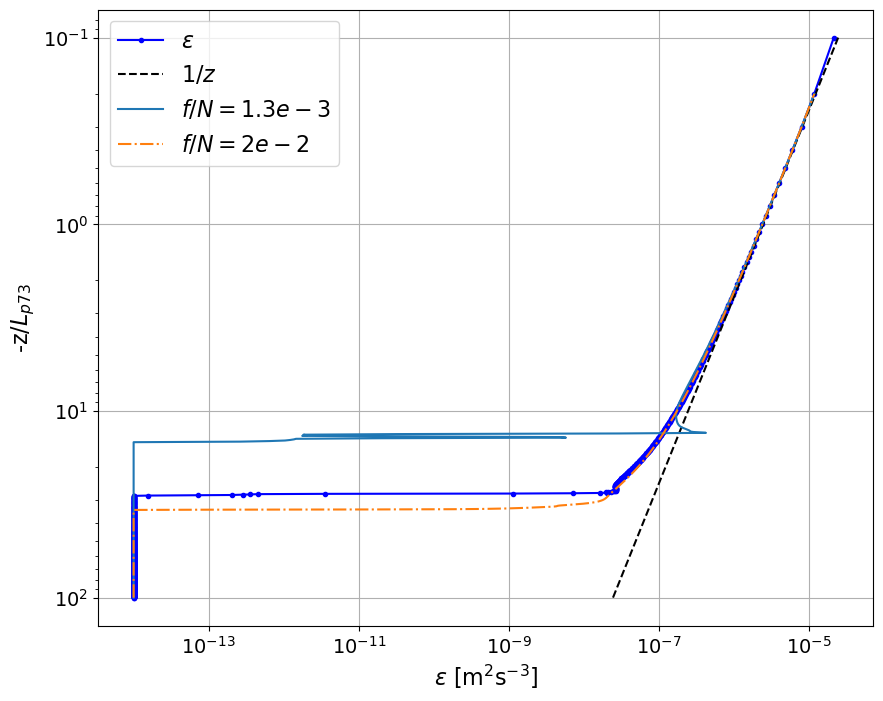

In [9]:
fig, (ax1) = plt.subplots(1,1,figsize=(10, 8))

# Calcul de t_14
#t_1z = -1/zi[0,:-1] * eps_rot[-1, -3]
t_1z = -us**3/(kappa*zi[0,:-1])# * eps_rot[-1, -3]
t_1z2 = 1/zi[0,:-1]**2 * 2e-5


ax1.plot(eps_rot[-1,:-1], -zi[-1,:-1], '.-', color='b', label ='$\epsilon$')
ax1.plot(t_1z, -zi[-1,:-1], '--', color='k', label='$1/z$')

ax1.invert_yaxis()

ax1.grid()
ax1.set_ylabel(r'-z/$L_{p73}$', fontsize=16)
ax1.set_xlabel(r'$\epsilon$ [m$^2$s$^{-3}$]', fontsize=16)

# Tracer la fonction existante
#ax.plot(gamma, zi[-1, :-1]/L_p73_min, label=r'$\Gamma$')
ax1.plot(eps_min_last[:-1], -zi_fn[-1, :-2], label=r'$f/N = 1.3e-3$')
ax1.plot(eps_max_last[:-1], -zi_fn[-1, :-2], '-.',label=r'$f/N = 2e-2$')
ax1.tick_params(axis='both', labelsize=14)
#ax1.set_ylim([-40, 0])
ax1.set_xscale('log')
ax1.set_yscale('log')
plt.legend(fontsize=16)

#plt.savefig('profil_vertical_eps_log.png')


## Profil de dissusivité turulente


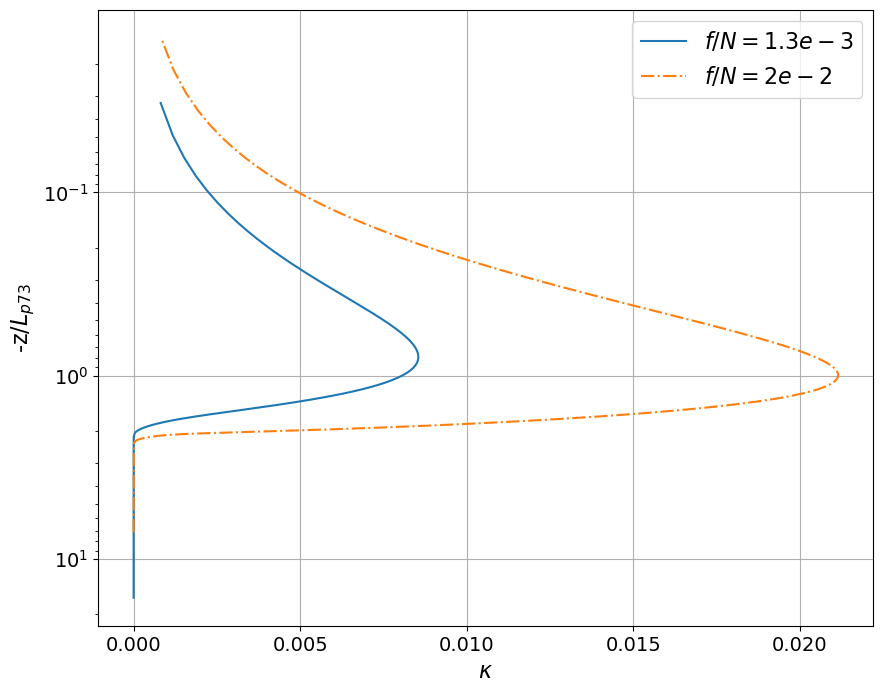

In [10]:
fig, (ax1) = plt.subplots(1,1,figsize=(10, 8))

# Calcul de t_14
#t_1z = -1/zi[0,:-1] * eps_rot[-1, -3]
t_1z = -us**3/(kappa*zi[0,:-1])# * eps_rot[-1, -3]
t_1z2 = 1/zi[0,:-1]**2 * 2e-5


#ax1.plot(eps_rot[-1,:-1], -zi[-1,:-1]/L_p73, '.-', color='b', label ='$\epsilon$')
#ax1.plot(t_1z, -zi[-1,:-1]/L_p73, '--', color='k', label='$1/z$')

ax1.invert_yaxis()

ax1.grid()
ax1.set_ylabel(r'-z/$L_{p73}$', fontsize=16)
ax1.set_xlabel(r'$\kappa$', fontsize=16)

# Tracer la fonction existante
#ax.plot(gamma, zi[-1, :-1]/L_p73_min, label=r'$\Gamma$')
ax1.plot(num_min_last[:-1], -zi_fn[-1, :-2]/L_p73_min, label=r'$f/N = 1.3e-3$')
ax1.plot(num_max_last[:-1], -zi_fn[-1, :-2]/L_p73_max, '-.',label=r'$f/N = 2e-2$')
ax1.tick_params(axis='both', labelsize=14)
#ax1.set_ylim([-40, 0])
#ax1.set_xscale('log')
ax1.set_yscale('log')
plt.legend(fontsize=16)

plt.savefig('profil_vertical_eps_log.png')


### Profil de vitesse


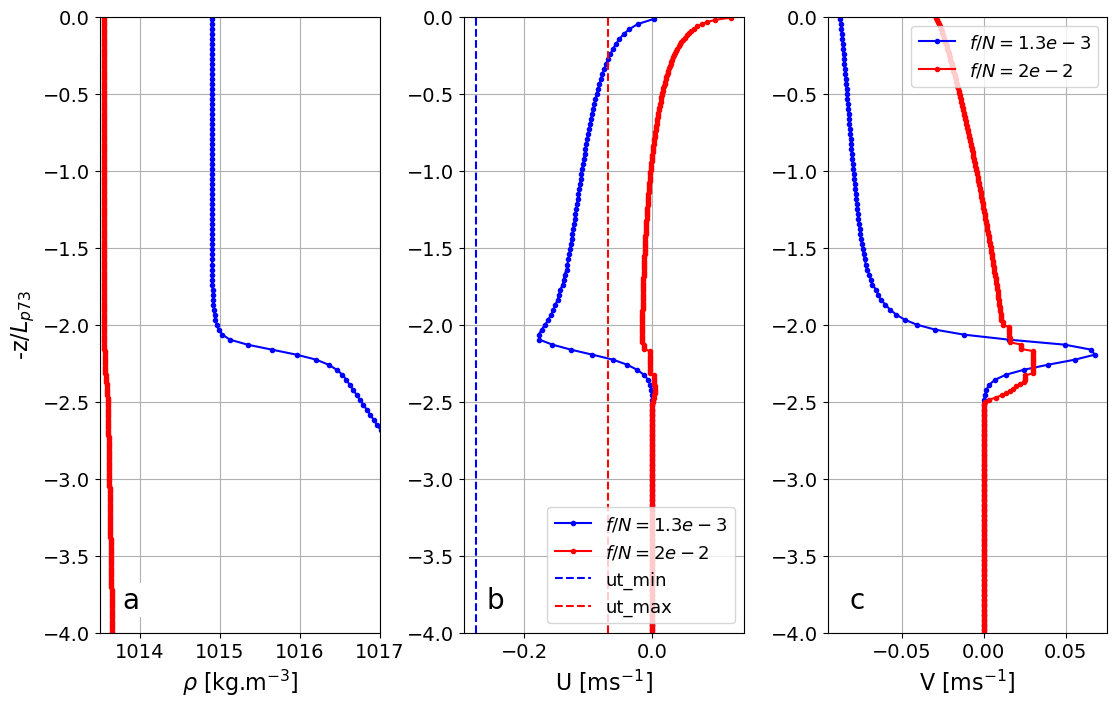

In [275]:
ut_min = -us / np.sqrt(f_min/np.sqrt(NN_min))
ut_max = -us / np.sqrt(f_max/np.sqrt(NN_max))


profil_log = -us/kappa*np.log((-z[-1]))+0.02
L_p73 = us/np.sqrt(np.sqrt(NN0)*f)
fig, (ax1,ax2, ax3) = plt.subplots(1,3,figsize=(13, 8))

# Calcul de t_14
t_1z = -1/zi[0,:-1] * eps_rot[-1, -3]
t_1z2 = 1/zi[0,:-1]**2 * 2e-5

ax1.plot(rho_max_last, z_fn[-1]/L_p73_max, '.-', color='r')
ax1.plot(rho_min_last, z_fn[-1]/L_p73_min, '.-', color='b')
#ax1.invert_yaxis()
ax1.grid()
ax1.set_ylabel(r'-z/$L_{p73}$', fontsize=16)
ax1.set_xlabel(r'$\rho$ [kg.m$^{-3}$]', fontsize=16)
ax1.tick_params(axis='both', labelsize=14)
ax1.set_ylim([-4, 0])
ax1.set_xlim([ 1013.5,1017])
#ax1.set_xlim([ 1013.5,1013.7])
ax1.text(0.08, 0.03, 'a', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=20, bbox=bprops)


 
ax2.plot(u_min_last, z_fn[-1]/L_p73_min, '.-', color='b',label=r'$f/N = 1.3e-3$')
ax2.plot(u_max_last, z_fn[-1]/L_p73_max, '.-', color='r',label=r'$f/N = 2e-2$')
#ax2.plot(u_rot[-12], z[-1], '.-', color='r',label=r'$t=12.5 \: T_f$')
#ax2.plot(profil_log, z_fn[-1]/L_p73_max, '--', color='k', label =r'$(u_*/ \kappa)\ln(z/z_0)$')
ax2.axvline(ut_min, color='b', linestyle='--', label='ut_min')
ax2.axvline(ut_max, color='r', linestyle='--', label='ut_max')
ax2.invert_yaxis()
ax2.grid()
#ax2.set_ylabel('z [m]', fontsize=16)
ax2.set_xlabel(r'U [ms$^{-1}$]', fontsize=16)
ax2.tick_params(axis='both', labelsize=14)
ax2.set_ylim([-4, 0])
#ax2.set_xlim([-0.1, 0.1])
ax2.legend(fontsize=13,loc='lower right')
ax2.text(0.08, 0.03, 'b', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=20, bbox=bprops)


ax3.plot(v_min_last, z_fn[-1]/L_p73_min, '.-', color='b',label=r'$f/N = 1.3e-3$')
ax3.plot(v_max_last, z_fn[-1]/L_p73_max, '.-', color='r',label=r'$f/N = 2e-2$')
#ax3.plot(profil_log, z[-1], '--', color='k')
ax3.invert_yaxis()
ax3.grid()
#ax3.set_ylabel('z [m]', fontsize=16)
ax3.set_xlabel(r'V [ms$^{-1}$]', fontsize=16)
ax3.tick_params(axis='both', labelsize=14)
#ax3.set_xlim([-0.1, 0.1])
ax3.set_ylim([-4, 0])
ax3.legend(fontsize=13,loc='upper right')
ax3.text(0.08, 0.03, 'c', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax3.transAxes, fontsize=20, bbox=bprops)


plt.subplots_adjust(wspace=0.3)

#plt.savefig('profil_vertical_rho_u')

In [276]:
ut_min = us / np.sqrt(f_min/np.sqrt(NN_min))
#ut_max = us / np.sqrt(f_max/np.sqrt(NN_max))

In [277]:
ut_min

0.27494940752199404

## Serie temporelle en surface


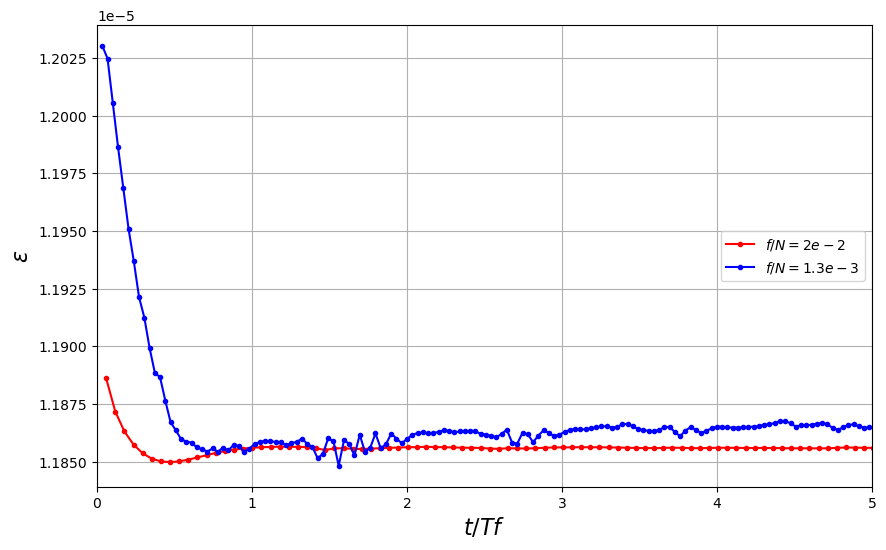

In [278]:
plt.figure(figsize=(10, 6))
plt.plot(t_fn[1:]/T_f,eps_max[1:,-2], '.-', color='r',label=r'$f/N = 2e-2$') 
plt.plot(t_fn[1:]/T_f_min,eps_min[1:,-2], '.-', color='b',label=r'$f/N = 1.3e-3$') 

#plt.plot(t[1:]/hour,u_ek[1:], '.-', color='b') 
plt.grid()
plt.xlabel('$t/Tf$', fontsize=16)
plt.ylabel(r'$\epsilon$', fontsize=16)
plt.legend(loc='center right')
plt.xlim([0, 5])
#plt.text(0.1, 2.19, 'Dissipation surface', verticalalignment='bottom', horizontalalignment='left',
#         backgroundcolor='w', fontsize=18, bbox=bprops)
ax.tick_params(axis='both', labelsize=14)
#plt.savefig('evol_tke')


plt.show()

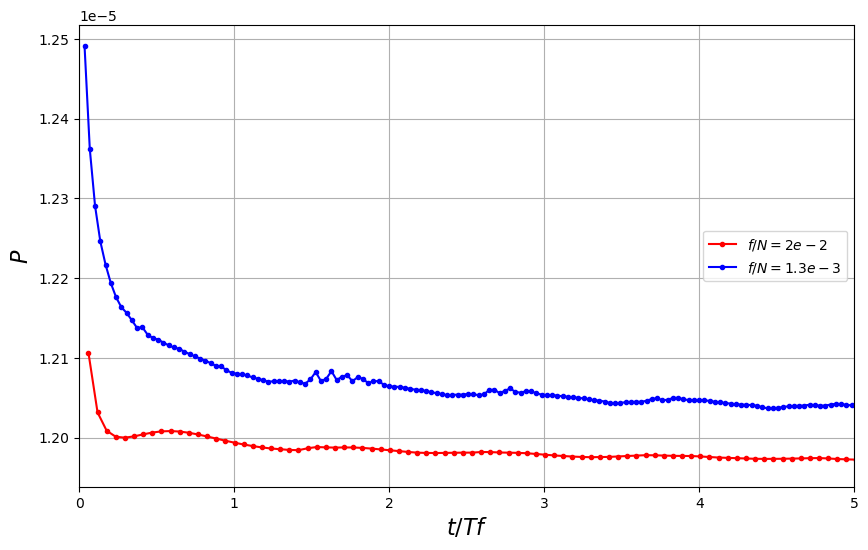

In [279]:
plt.figure(figsize=(10, 6))
plt.plot(t_fn[1:]/T_f,P_fn_max[1:,-2], '.-', color='r',label=r'$f/N = 2e-2$') 
plt.plot(t_fn[1:]/T_f_min,P_fn_min[1:,-2], '.-', color='b',label=r'$f/N = 1.3e-3$') 

#plt.plot(t[1:]/hour,u_ek[1:], '.-', color='b') 
plt.grid()
plt.xlabel('$t/Tf$', fontsize=16)
plt.ylabel(r'$P$', fontsize=16)
plt.legend(loc='center right')
plt.xlim([0, 5])
ax.tick_params(axis='both', labelsize=14)
#plt.savefig('evol_tke')
plt.show()

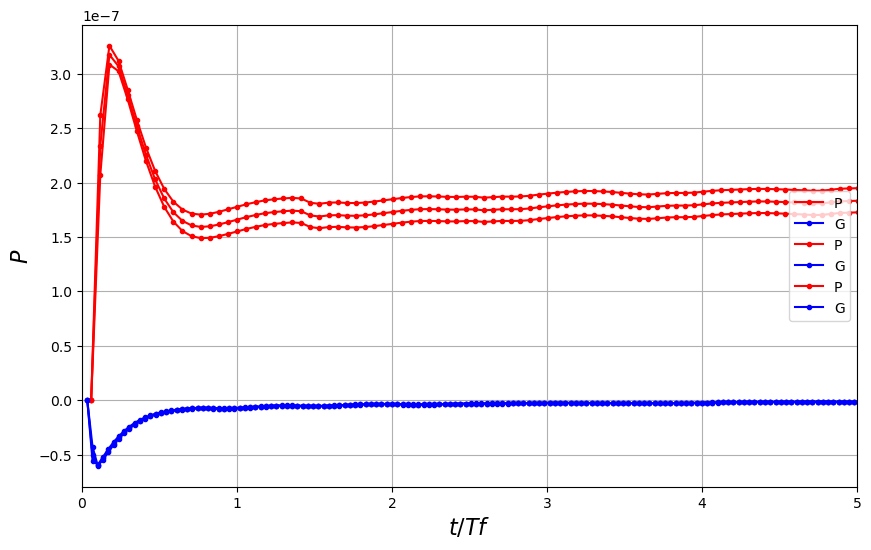

In [280]:
plt.figure(figsize=(10, 6))
plt.plot(t_fn[1:]/T_f,P_fn_max[1:,-50], '.-', color='r',label=r'P') 
plt.plot(t_fn[1:]/T_f_min,G_fn_max[1:,-50], '.-', color='b',label=r'G') 

plt.plot(t_fn[1:]/T_f,P_fn_max[1:,-52], '.-', color='r',label=r'P') 
plt.plot(t_fn[1:]/T_f_min,G_fn_max[1:,-52], '.-', color='b',label=r'G') 
plt.plot(t_fn[1:]/T_f,P_fn_max[1:,-48], '.-', color='r',label=r'P') 
plt.plot(t_fn[1:]/T_f_min,G_fn_max[1:,-48], '.-', color='b',label=r'G') 
#plt.plot(t[1:]/hour,u_ek[1:], '.-', color='b') 
plt.grid()
plt.xlabel('$t/Tf$', fontsize=16)
plt.ylabel(r'$P$', fontsize=16)
plt.legend(loc='center right')
plt.xlim([0, 5])
ax.tick_params(axis='both', labelsize=14)
#plt.savefig('evol_tke')
plt.show()

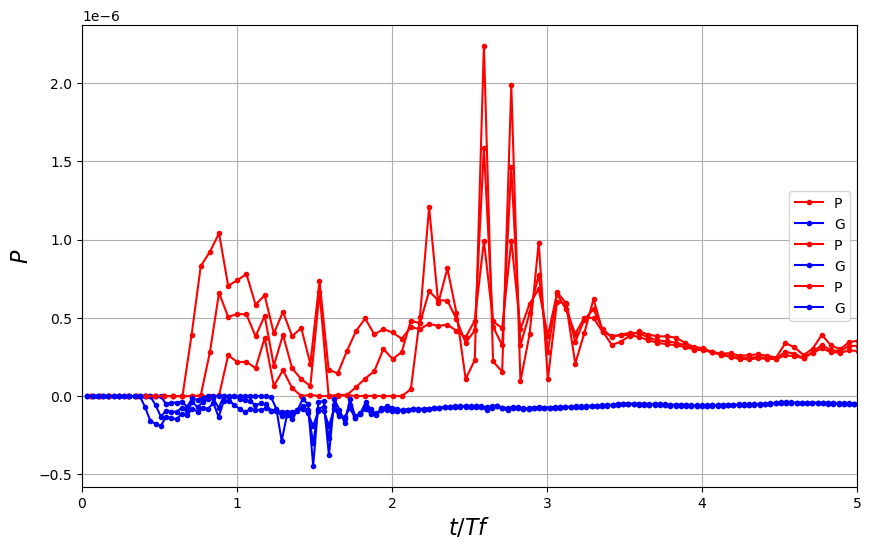

In [282]:
plt.figure(figsize=(10, 6))
plt.plot(t_fn[1:]/T_f,P_fn_min[1:,-50], '.-', color='r',label=r'P') 
plt.plot(t_fn[1:]/T_f_min,G_fn_min[1:,-50], '.-', color='b',label=r'G') 

plt.plot(t_fn[1:]/T_f,P_fn_min[1:,-52], '.-', color='r',label=r'P') 
plt.plot(t_fn[1:]/T_f_min,G_fn_min[1:,-52], '.-', color='b',label=r'G') 
plt.plot(t_fn[1:]/T_f,P_fn_min[1:,-48], '.-', color='r',label=r'P') 
plt.plot(t_fn[1:]/T_f_min,G_fn_min[1:,-48], '.-', color='b',label=r'G') 
#plt.plot(t[1:]/hour,u_ek[1:], '.-', color='b') 
plt.grid()
plt.xlabel('$t/Tf$', fontsize=16)
plt.ylabel(r'$P$', fontsize=16)
plt.legend(loc='center right')
plt.xlim([0, 5])
ax.tick_params(axis='both', labelsize=14)
#plt.savefig('evol_tke')
plt.show()

In [281]:
z[0,-].data

SyntaxError: invalid syntax (1433997600.py, line 1)